In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
#example1
X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans.labels_)
print(kmeans.predict([[0,0],[4,4]]))
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[ 4.  2.]
 [ 1.  2.]]


((200, 2), (200,))


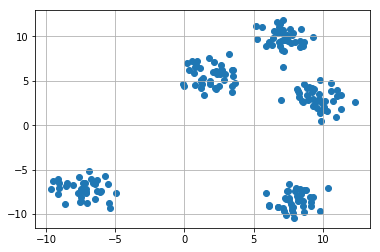

In [3]:
#example2
X,y = make_blobs(n_samples=200, centers=5)
print(X.shape, y.shape)

#plotting the data
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
clf=KMeans(n_clusters=5)
clf.fit(X)

print(clf.labels_)

z = clf.cluster_centers_
print(z)

[3 0 3 1 3 2 1 1 2 1 1 3 3 4 4 2 3 1 4 2 0 2 4 4 0 1 2 3 2 2 2 0 0 2 1 3 0
 1 1 3 4 1 1 2 4 3 1 3 3 4 0 3 4 2 3 3 3 4 1 2 4 0 1 0 3 2 1 0 3 4 1 1 2 1
 2 0 4 4 3 1 4 0 2 1 3 3 3 1 0 2 1 4 3 0 2 2 4 2 0 4 2 4 0 0 4 4 4 2 1 0 2
 1 0 4 4 0 0 0 1 2 0 1 2 3 1 2 3 2 4 1 3 0 4 0 3 3 0 4 1 4 1 4 2 2 2 3 0 3
 3 0 3 3 4 2 4 2 2 4 3 3 1 0 0 0 2 1 2 4 0 4 3 3 1 4 4 3 2 1 0 3 0 1 0 4 1
 2 1 0 2 0 4 0 2 4 3 0 1 0 4 1]
[[ 7.14141548  9.87894623]
 [ 7.95358218 -8.49276578]
 [-7.28920885 -7.19425987]
 [ 9.60755216  3.00972529]
 [ 1.88539333  5.59747602]]


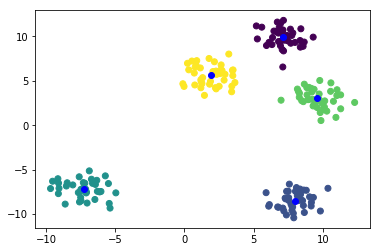

In [5]:
plt.scatter(X[:,0], X[:,1], c= clf.labels_)
plt.scatter(z[:,0], z[:,1], c='blue')
plt.show()

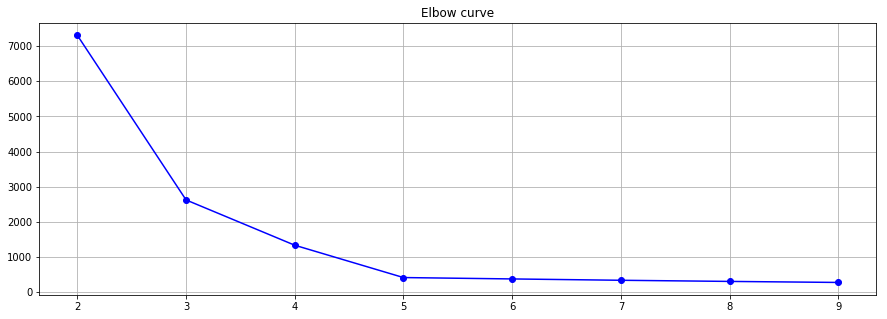

In [6]:
distortions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,10), distortions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')
plt.show()

## Using Mall Dataset

In [7]:
filename = 'Mall_Customers.csv'
df = pd.read_csv(filename)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df = df.drop(['CustomerID'],axis = 1).copy()

In [10]:
gender_encoder = LabelEncoder()
gender_encoder.fit(df['Gender'])
df['Gender'] = gender_encoder.transform(df['Gender'])
print(df.head())
print(df['Gender'].value_counts())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40
0    112
1     88
Name: Gender, dtype: int64


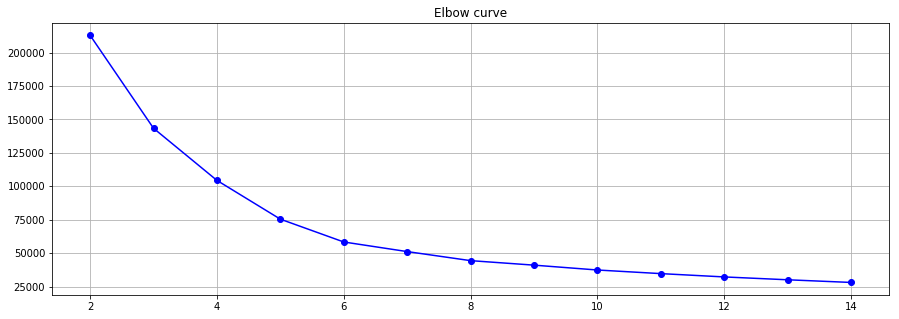

In [11]:
distortions = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,15), distortions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [12]:
km = KMeans(n_clusters = 3)
clf = km.fit(df)


print(clf.labels_)

z = clf.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


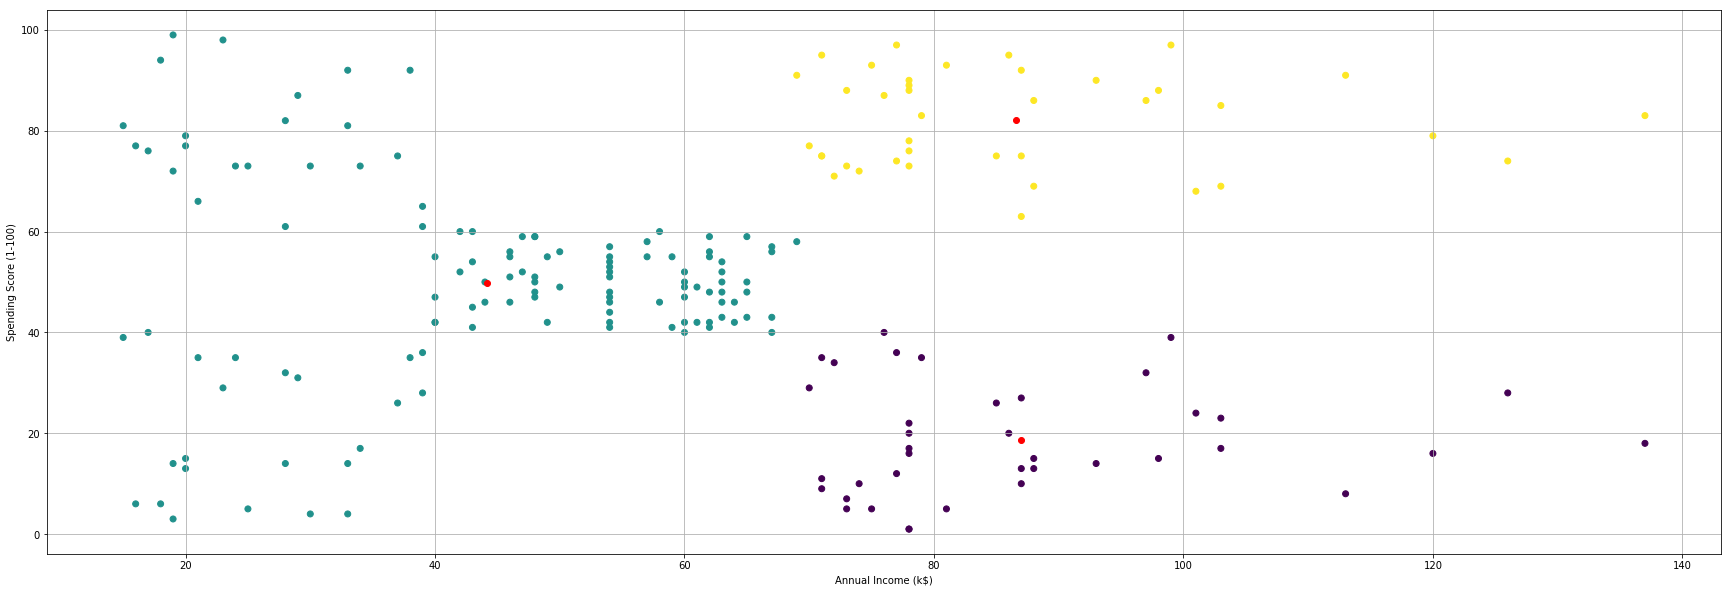

In [13]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df, c= clf.labels_)
plt.scatter(x = z[:,2], y =z[:,3], c='red')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()